In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
df_canada=pd.read_excel('./archive/Canada.xlsx',sheet_name='Canada by Citizenship',skiprows = range(20),
skipfooter = 2)

In [58]:
df_canada.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [59]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

In [77]:
df1=df_canada.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'})

In [80]:
#df1.dtypes
df1.columns=list(map(str,df1.columns))
years=list(map(str,range(1980,2013)))

In [116]:
df1['Total']=df1.sum(axis=1)
df1.set_index('Country',inplace=True)

In [90]:
df1['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [88]:
#group by continent
df_continents=df1.groupby(['Continent'],axis=0).sum()

In [89]:
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,6189480
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,33177940
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,14109470
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,7651480
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,2411420
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,551740


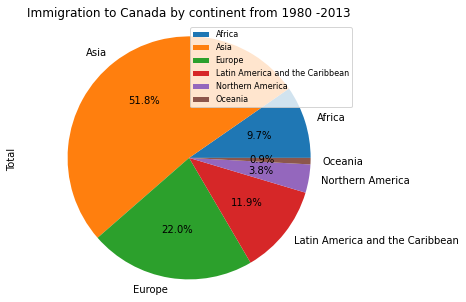

In [107]:
#visualization of immigration to canada by continent
df_continents['Total'].plot(kind='pie',figsize=(6,5),autopct='%1.1f%%')
plt.title("Immigration to Canada by continent from 1980 -2013")
plt.axis('equal')
plt.legend(labels=df_continents.index,loc='upper right',prop={'size': 8})
plt.show()

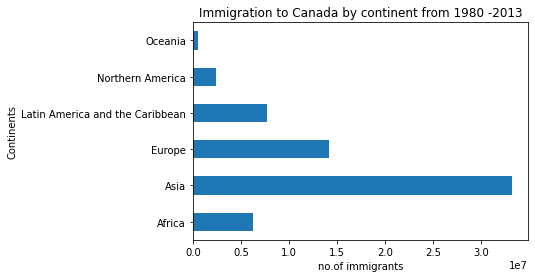

In [108]:
#using bar plot immigration to canada with respect to continent
df_continents['Total'].plot(kind='barh')
plt.title("Immigration to Canada by continent from 1980 -2013")
plt.xlabel("no.of immigrants")
plt.ylabel("Continents")
plt.show()

In [109]:
df1.Continent.value_counts()

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: Continent, dtype: int64

In [119]:
#pick just asia information
df_asia=df1.loc[df1.Continent=='Asia']
#sort by total
df_asia_sorted=df_asia.sort_values(by='Total',ascending=False,axis=0)

In [120]:
df_asia_sorted.iloc[:5]['Total']

Country
India                         9686656
China                         9239468
Philippines                   7159474
Pakistan                      3382400
Iran (Islamic Republic of)    2462922
Name: Total, dtype: int64

In [121]:
#visualization of the immigration based on the country in asia

<AxesSubplot:ylabel='Country'>

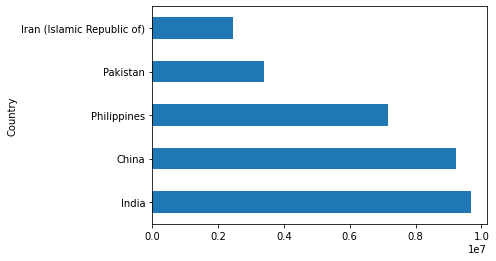

In [122]:
df_asia_sorted.iloc[:5]['Total'].plot(kind='barh')

/home/diganta/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


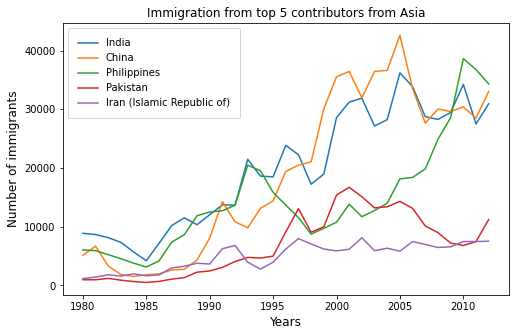

In [132]:
#plot immigration pattern for top 5 contributors from Asia
top5_asia_countires = list(df_asia_sorted.iloc[:5].index)
df_top5_asia_countires = df1.loc[top5_asia_countires, years]
df_top5_asia_countires.transpose().plot(kind = 'line', figsize=(8, 5))
plt.title('Immigration from top 5 contributors from Asia')
plt.ylabel('Number of immigrants',fontsize=12)
plt.xlabel('Years',fontsize=12)
leg = plt.legend(loc='upper left', borderpad = 1, prop={'size': 10})

In [133]:
#visualization of the immigration of top 5 countries with rest of the word


In [136]:
df_fraction = df_top5_asia_countires.divide(df_continents.sum(axis = 0), axis = 1)
df_fraction.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,0.089573,0.078417,0.078133,0.097128,0.077693,0.060176,0.083093,0.075602,0.082710,0.062901,...,0.140645,0.137005,0.123672,0.116278,0.118408,0.123612,0.111737,0.120727,NaN,NaN
China,0.051676,0.060436,0.031725,0.024659,0.020799,0.025951,0.022778,0.019611,0.019798,0.026291,...,0.165402,0.135669,0.118939,0.123585,0.119075,0.109732,0.115770,0.128888,NaN,NaN
Philippines,0.061037,0.053553,0.050340,0.060384,0.051773,0.045014,0.048415,0.054611,0.062015,0.072157,...,0.070454,0.074477,0.085355,0.102396,0.114858,0.139434,0.149333,0.133927,NaN,NaN
Pakistan,0.009865,0.008791,0.011518,0.011913,0.009099,0.007345,0.008030,0.007954,0.009576,0.013750,...,0.055598,0.053133,0.043562,0.037005,0.029011,0.024592,0.030334,0.043817,NaN,NaN
Iran (Islamic Republic of),0.011822,0.012925,0.017474,0.021072,0.026928,0.023550,0.020849,0.022178,0.023495,0.022994,...,0.022672,0.030276,0.030008,0.026641,0.026450,0.026997,0.030378,0.029404,NaN,NaN


/home/diganta/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


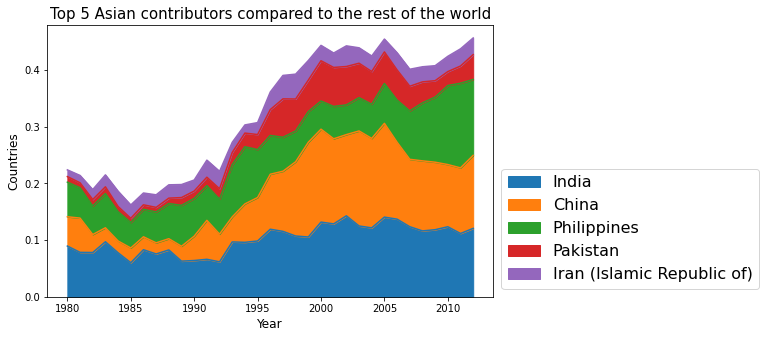

In [139]:
df_fraction[years].transpose().plot(kind='area', stacked=True, figsize=(8, 5))
plt.title('Top 5 Asian contributors compared to the rest of the world', fontsize=15)
plt.ylabel('Countries', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 0.5), prop={'size': 16})